<span style="color:blue">DAY-8</span>

<span style="color:red;"><b> TITANIC DATASET - INTRODUCTION </b></span>

In [2]:
import pandas as pd
import numpy as np
import os
print(os.getcwd())


C:\Users\mehra\Data science training


In [3]:


df = pd.read_csv(r"C:\Users\mehra\Data science training/Titanic-Dataset.csv")


In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
df[df["Survived"] == 1]["Sex"].value_counts()


Sex
female    233
male      109
Name: count, dtype: int64

In [8]:
skew_values=df.skew(numeric_only=True)
print(skew_values)

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.389108
SibSp          3.695352
Parch          2.749117
Fare           4.787317
dtype: float64


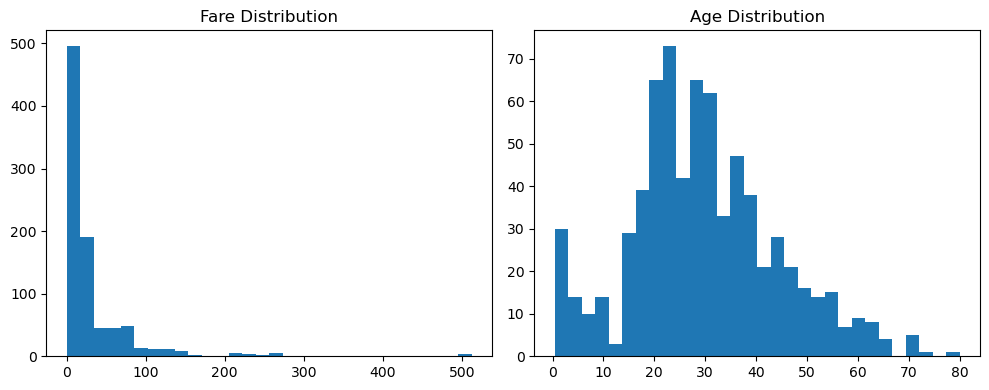

In [11]:
import matplotlib.pyplot as plt  # Importing the plotting library

plt.figure(figsize=(10,4))  # Creating a figure of size 10 inches by 4 inches

# First subplot - Fare Distribution
plt.subplot(1, 2, 1)  # Creating a subplot grid of 1 row, 2 columns, selecting the 1st plot
plt.hist(df['Fare'], bins=30)  # Plotting histogram of 'Fare' column with 30 bins
plt.title('Fare Distribution')  # Setting title for the first histogram

# Second subplot - Age Distribution
plt.subplot(1, 2, 2)  # Selecting the 2nd plot in the same subplot grid
plt.hist(df['Age'].dropna(), bins=30)  # Plotting histogram of 'Age' after dropping missing values (NaN), with 30 bins
plt.title('Age Distribution')  # Setting title for the second histogram

plt.tight_layout()  # Adjusting subplots so they don't overlap
plt.show()  # Displaying the plots


In [13]:
df.isnull().sum()["Age"]

np.int64(177)

In [14]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Encode Sex as 0 (male) and 1 (female)
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)  # One-hot encode Embarked, drop one dummy to avoid multicollinearity


<Axes: xlabel='Survived', ylabel='count'>

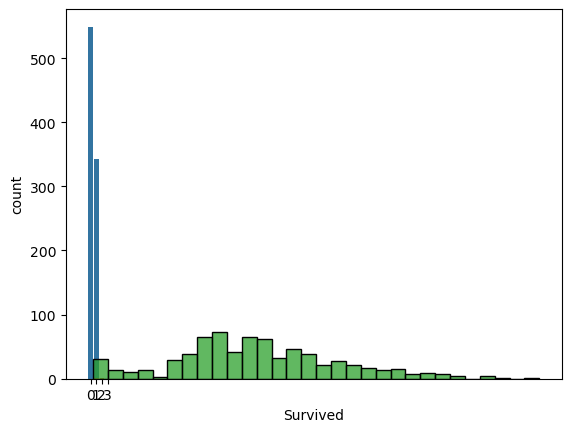

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='Survived', data=df)  # Check survival distribution

sns.barplot(x='Pclass', y='Survived', data=df)  # Survival rate by Passenger Class

sns.histplot(df['Age'], bins=30)  # Distribution of Age


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked_Q   891 non-null    bool   
 12  Embarked_S   891 non-null    bool   
dtypes: bool(2), float64(2), int64(6), object(3)
memory usage: 78.4+ KB
